# Projeto 1 - Estatística

# Preço vs. Falência

### Integrantes

| Nome   |      No. USP      |
|----------|:-------------:|
| Téo Sobrino Alves |  12557192 |
| Jorge Augusto Salgado Salhani |    8927418   |
| Marcus Vinicius Santos Rodrigues | 11218862 |
| Victor Hugo Oliveira da Silva | 11320901 |        


### Problema - Visão geral

- Você é um vendedor de peixes grelhados. 

- Você é responsável por pescar, cozinhar e vender o peixe. (Armazenando apenas um único peixe)

- A cada hora, um cliente pode aparecer na sua loja, e isso determina sua próxima ação

Valores:

- A cada venda: $+S$ reais

- A cada hora: $-T$ reais (aluguel)

- Lucro ($L$): $L = S - T$ por hora

## Modelagem por Cadeias de Markov



### Códigos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from pydoc import describe

In [2]:
def proxima_acao(curr_state, cap, clientes_p, h_desc, contador_transic, q, p, custo_peixe, preco_barraca):
    probtrans = np.array([[0, p, 0, (1-p)], 
                    [q, (1-q), 0, 0],
                    [p, 0, (1-p), 0], 
                    [p*q, p*(1-q), q*(1-p), (1-p)*(1-q)]])
    
    vetprob = probtrans[curr_state]
    next_state = np.random.choice(4, p = vetprob)
    contador_transic[curr_state, next_state] += 1
    cap -= preco_barraca
    if(next_state == 2):
        h_desc = 0
    else:
        h_desc += 1
        if(next_state == 0):
            cap += custo_peixe
    if next_state == 0 and np.random.random() <= p and curr_state == 1:
        clientes_p += 1
    elif curr_state == 1 and next_state == 1 and np.random.random() <= p:
        clientes_p += 1
    return next_state, cap, clientes_p, h_desc, contador_transic

In [3]:
def simular_N_horas_M_barracas(N_horas, M_barracas):
  colunas = []
  colunas.append("estado")
  colunas.append("ClientesAtendidos")
  colunas.append("ClientesPerdidos")
  colunas.append("CapitalAtual")
  colunas.append("TempoDescansos")

  for i in range(0, 4):
      for j in range(0, 4):
          coluna = str(i) + " -> " + str(j)
          colunas.append(coluna)

  n_barracas = M_barracas
  n_horas = N_horas
  dados = np.zeros((n_barracas*n_horas, 21))
  df = pd.DataFrame(dados, columns=colunas)
  
  curr_state = 3
  cap = 0
  cap_ini = 0
  clientes_p = 0
  h_desc = 0
  cont_trans = np.zeros((4,4))
  q = 0.7
  p = 0.4
  custo_peixe = 32
  preco_barraca = 10
  
  list = [3]
  for l in range(20):
      list.append(0)


  for k in range(n_horas*n_barracas):
      if(k%900 == 0):
          curr_state = 3
          cap = clientes_p = h_desc = 0
          cont_trans = np.zeros((4,4))
      curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q, p, custo_peixe, preco_barraca)
      c_at = sum(cont_trans[0])
      newline = [curr_state, c_at, clientes_p, cap, h_desc]
      for i in range(0, 4):
          for j in range(0, 4):
              newline.append(cont_trans[i][j])
      df.loc[k+1] = newline
      
      # modo preguiçoso:
      # if(cap > cap_ini):
      #     q = 0.8*q
      # elif(cap < cap_ini and q < 0.7):
      #     q = q/0.8
  # print(np.sum(cont_trans/(n_horas), axis = -1))
  # df
  return df


### Descrição

Sejam $C$ e $P$ variáveis aleatórias onde 

- $C$: Presença de cliente na loja
- $P$: Existe um peixe disponível

Existem 4 estados possíveis:


| Índice | Estado atual ($C, P$)   |     Descrição      |
|------|:------------:|-------------|
|0| $C \cap P$ | Cozinhar e vender |
|1| $C \cap \sim P$ | Pescar |
|2| $\sim C \cap P$ | Descansar |
|3| $\sim C \cap \sim P$ | Pescar |


Matriz de probabilidade de transição $P$:

$$
P =
\left [
  \begin{array}{ccc}
  0 & p & 0 & (1-p) \\
  q & (1-q) & 0 & 0 \\
  p & 0 & (1-p) & 0 \\
  pq & p(1-q) & q(1-p) & (1-q)(1-p) \\
  \end{array}
\right ]
\begin{array}{c}
0 \\
1 \\
2 \\
3
\end{array}
$$


Sendo 

- Primeira linha: estado 0
- Segunda linha: estado 1
- $...$

E também

- $p$: probabilidade de chegar um cliente
- $q$: probabilidade de pescar um peixe

In [4]:
df = simular_N_horas_M_barracas(5, 1)
df

,estado,ClientesAtendidos,ClientesPerdidos,CapitalAtual,TempoDescansos,0 -> 0,0 -> 1,0 -> 2,0 -> 3,1 -> 0,...,1 -> 2,1 -> 3,2 -> 0,2 -> 1,2 -> 2,2 -> 3,3 -> 0,3 -> 1,3 -> 2,3 -> 3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,-10.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,-20.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,1.0,0.0,-8.0,4.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2.0,1.0,0.0,-18.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
n_horas = 100000
df = simular_N_horas_M_barracas(n_horas, 1)
print(len(df[df['estado'] == 0])/n_horas)
print(len(df[df['estado'] == 1])/n_horas)
print(len(df[df['estado'] == 2])/n_horas)
print(len(df[df['estado'] == 3])/n_horas)

0.31378
0.2217
0.236
0.22853


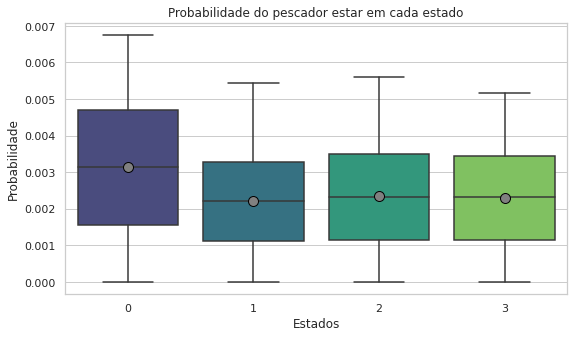

In [7]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(data = ((df["0 -> 0"] + df["1 -> 0"] + df["2 -> 0"] + df["3 -> 0"])/45000, 
(df["0 -> 1"] + df["1 -> 1"] + df["2 -> 1"] + df["3 -> 1"])/45000, 
(df["0 -> 2"] + df["1 -> 2"] + df["2 -> 2"] + df["3 -> 2"])/45000, 
(df["0 -> 3"] + df["1 -> 3"] + df["2 -> 3"] + df["3 -> 3"])/45000), 
showmeans=True, meanprops={"marker": "o", "markerfacecolor": "grey", 
"markeredgecolor": "black", "markersize": "10"},
palette= "viridis").set(title='Probabilidade do pescador estar em cada estado')
#palette='viridis' ou 'cubehelix' ou 'rocket' se pá
plt.xlabel('Estados')
plt.ylabel('Probabilidade')
plt.show()

## Estudo de Convergência: Exponenciação matricial

### Código

In [8]:
def exponenciar_matrix(matriz_transicao_T, N):
  if N == 0 or N == 1: return matriz_transicao_T
  result = np.matmul(matriz_transicao_T, matriz_transicao_T)
  return exponenciar_matrix(result, N-1)

In [9]:
p = 0.4
q = 0.7

T = [
  [0,     p,        0,        (1-p)       ], 
  [q,     (1-q),    0,        0           ],
  [p,     0,        (1-p),    0           ], 
  [(p*q), p*(1-q),  q*(1-p),  (1-p)*(1-q) ]
]
m = exponenciar_matrix(T, 50)
print(m)

[[0.31351303 0.21847598 0.24086977 0.22939978]
 [0.31351303 0.21847598 0.24086977 0.22939978]
 [0.31351303 0.21847598 0.24086977 0.22939978]
 [0.31351303 0.21847598 0.24086977 0.22939978]]


### Descrição

Dada uma matriz de probabilidade de transição $P$
- $P^2$: probabilidade de transitar $i \to j$ em $n = 2$ passos
- $P^3$: probabilidade de transitar $i \to j$ em $n = 3$ passos
- $...$

Se $n = N$ grande, encontramos a probabilidade de estar no estado $j$ no regime estacionário

- $P(e=0) \approx 0.3135$
- $P(e=1) \approx 0.2185$
- $P(e=2) \approx 0.2409$
- $P(e=3) \approx 0.2294$

Que confere com os resultados experimentais

## Resultados

In [10]:
def simular_N_horas_M_barracas_var_PQ_preguicoso(N_horas, M_barracas, p, q, custo_peixe, capital_inicial):

  k = 0
  colunas = []
  colunas.append("estado")
  colunas.append("ClientesAtendidos")
  colunas.append("ClientesPerdidos")
  colunas.append("CapitalAtual")
  colunas.append("TempoDescansos")

  for i in range(0, 4):
      for j in range(0, 4):
          coluna = str(i) + " -> " + str(j)
          colunas.append(coluna)
  
  n_barracas = M_barracas
  n_horas = N_horas
  dados = np.zeros((n_barracas*n_horas, 21))
  df = pd.DataFrame(dados, columns=colunas)
  
  curr_state = 3
  cap = capital_inicial
  clientes_p = 0
  if(custo_peixe <= 33): k = 1
  h_desc = 0
  cont_trans = np.zeros((4,4))
  custo_peixe = custo_peixe+k
  preco_barraca = 10
  
  for k in range(n_horas*n_barracas):
    # modo preguiçoso:
      if(cap > capital_inicial and q > 0.6):
          q = np.round(0.8*q, 2)
      elif(cap < capital_inicial and q < 0.6):
          q = np.round(q/0.8, 2)
          
      curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q, p, custo_peixe, preco_barraca)
    
      c_at = sum(cont_trans[0])
      newline = [curr_state, c_at, clientes_p, cap, h_desc]
      for i in range(0, 4):
          for j in range(0, 4):
              newline.append(cont_trans[i][j])
      df.loc[k] = newline

  return df

In [11]:
def simular_N_horas_M_barracas_var_PQ(N_horas, M_barracas, p, q, custo_peixe, capital_inicial):
  
  colunas = []
  colunas.append("estado")
  colunas.append("ClientesAtendidos")
  colunas.append("ClientesPerdidos")
  colunas.append("CapitalAtual")
  colunas.append("TempoDescansos")

  for i in range(0, 4):
      for j in range(0, 4):
          coluna = str(i) + " -> " + str(j)
          colunas.append(coluna)

  n_barracas = M_barracas
  n_horas = N_horas
  dados = np.zeros((n_barracas*n_horas, 21))
  df = pd.DataFrame(dados, columns=colunas)
  
  curr_state = 3
  cap = capital_inicial
  cap_ini = 0
  clientes_p = 0
  h_desc = 0
  cont_trans = np.zeros((4,4))
  custo_peixe = custo_peixe
  preco_barraca = 10
  
  for k in range(n_horas*n_barracas):
      # if(k%900 == 0):
      #     curr_state = 3
      #     cap = clientes_p = h_desc = 0
      #     cont_trans = np.zeros((4,4))
      curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q, p, custo_peixe, preco_barraca)
      c_at = sum(cont_trans[0])
      newline = [curr_state, c_at, clientes_p, cap, h_desc]
      for i in range(0, 4):
          for j in range(0, 4):
              newline.append(cont_trans[i][j])
      df.loc[k] = newline
      
      # modo preguiçoso:
      # if(cap > cap_ini):
      #     q = 0.8*q
      # elif(cap < cap_ini and q < 0.7):
      #     q = q/0.8
  # print(np.sum(cont_trans/(n_horas), axis = -1))
  # df
  return df

## Questão 1: 

- Um pescador com maior capital inicial poderia vender mais barato e levar a falência a outro com menor capital?

### Vamos supor que

- Uma vendedora concorrente possui capital inicial maior

- Você: capital inicial: $C(t=0) = $R$ 500.00 

- Concorrente: capital inicial: $C(t=0) = $R$ 1000.00 

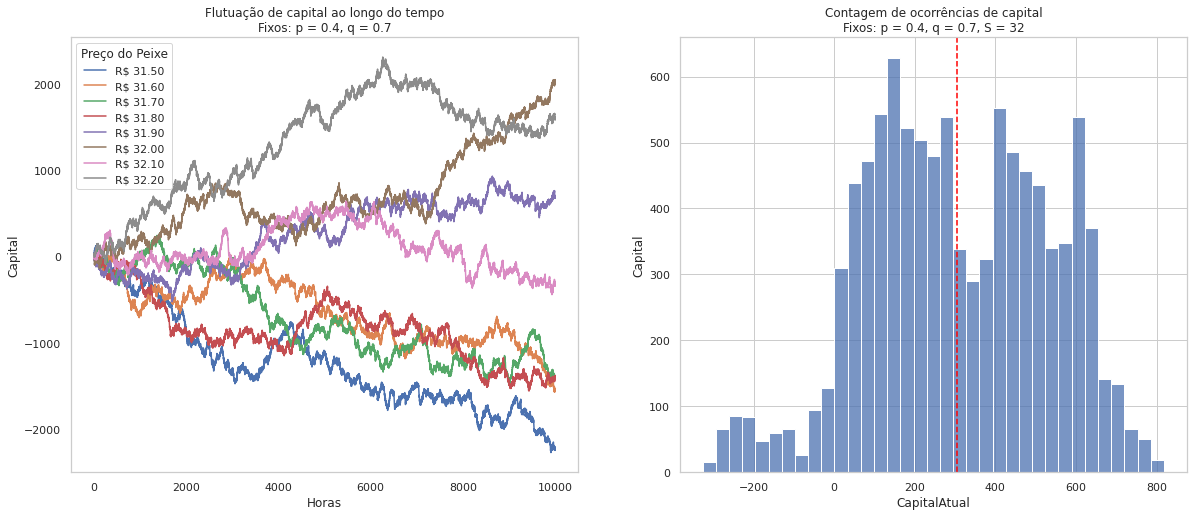

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
n_horas = 10000
dt = 0.1
custo_peixe = 31.5

for i in range(8):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=custo_peixe, capital_inicial=0)
  ax[0].plot([i for i in range(len(df))], df['CapitalAtual'], label='R\$ {:.2f}'.format(custo_peixe))
  custo_peixe += dt

ax[0].set_ylabel('Capital')
ax[0].set_xlabel('Horas')
ax[0].set_title('Flutuação de capital ao longo do tempo\nFixos: p = 0.4, q = 0.7')

ax[0].grid()
ax[0].legend()

df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=0)
sns.histplot(df, x='CapitalAtual', ax=ax[1], label='R\$ 32.00')
ax[1].axvline(np.mean(df['CapitalAtual']), color='red' , ls='dashed')

ax[0].legend(title='Preço do Peixe')

ax[1].set_title('Contagem de ocorrências de capital\nFixos: p = 0.4, q = 0.7, S = 32')
ax[1].set_ylabel('Número de ocorrências')
ax[1].set_ylabel('Capital')

plt.show()

O preço do peixe a aproximadamente R$ 32.00 mantém a estabilidade entre o lucro extremo (tendência crescente) e falência (tendência de queda).

Como a tendência representa o valor em médio-longo prazo

- Custo reduzido da concorrente é possível por tempo limitado. Caso contrário, a concorrente declara falência

In [13]:
n_horas = 1000
colun = ['capital_minimo']
capital_minimo_CI500 = []
capital_minimo_CI1000 = []
for i in range(1000):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=500)
  capital_minimo_CI500.append(np.min(df['CapitalAtual']))
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=1000)
  capital_minimo_CI1000.append(np.min(df['CapitalAtual']))

In [15]:
df_min500 = pd.DataFrame(capital_minimo_CI500, columns=colun)
df_min1000 = pd.DataFrame(capital_minimo_CI1000, columns=colun)

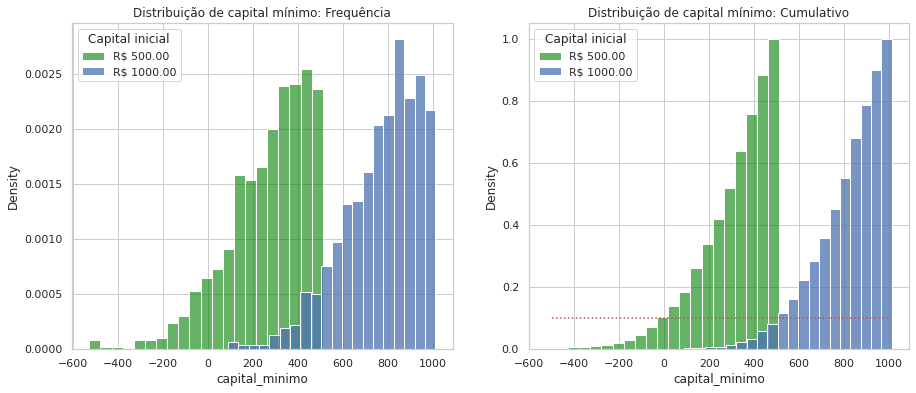

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(df_min500, x='capital_minimo', stat='density', ax=ax[0], color='green', alpha=.6)
sns.histplot(df_min1000, x='capital_minimo', stat='density', ax=ax[0])
sns.histplot(df_min500, x='capital_minimo', stat='density', cumulative=True, ax=ax[1], color='green', alpha=.6)
sns.histplot(df_min1000, x='capital_minimo', stat='density', cumulative=True, ax=ax[1])
ax[0].set_title('Distribuição de capital mínimo: Frequência')
ax[1].set_title('Distribuição de capital mínimo: Cumulativo')
ax[0].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
ax[1].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
ax[1].hlines(0.1, -500, 1000, 'r', ls='dotted')
plt.show()

Na presença de uma concorrente com maior capital inicial, como apenas para $\sim 1\%$ dos casos a concorrência leva você à falência e pode, a longo prazo, levá-la a falência, em geral não é uma estratégia muito vantajosa para a concorrente.

## Questão 2: 

- Qual é o capital final esperado após 900h, condicionado a não ter falido?

Como a falência ocorre para uma barraca sempre que $min[C(t)] < 0$

- O resultado esperado é análogo ao obtido na questão anterior, truncado em $c(t) = 0$.

- Por conta disso, a não falência depende diretamente do capital inicial $C_0 = C(t=0)$

Seja, por exemplo, $n$: no. horas, $T$: valor do aluguel da barraca

- A invariância por deslocamento em $y$ do resultado faz com que, caso não haja falência por conta do alto orçamento inicial ($C_0 \geq  nT$), o valor $C(t)$ mantém-se estável se $S \approx R\$ 32.00$, com $C(t) \approx C_0$

No entanto, vamos selecionar apenas barracas prósperas com $C_0 = R\$ 500.00$ e $C_0 = R\$ 1000.00$

In [17]:
n_horas = 1000
colun = ['capital']
capital_1 = []
capital_2 = []

for i in range(1000):
  df1 = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=500)
  df2 = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=1000)
  if np.min(df1['CapitalAtual']) < 0 or np.min(df2['CapitalAtual']) < 0:
    i-=1
  else:
    capital_1.append(np.mean(df1['CapitalAtual']))
    capital_2.append(np.mean(df2['CapitalAtual']))

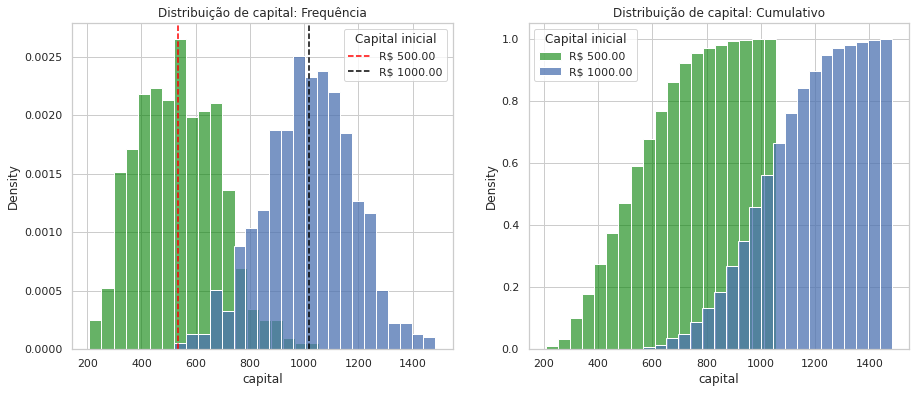

In [18]:
df_cap1 = pd.DataFrame(capital_1, columns=colun)
df_cap2 = pd.DataFrame(capital_2, columns=colun)

fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(df_cap1, x='capital', stat='density', ax=ax[0], color='green', alpha=.6)
sns.histplot(df_cap2, x='capital', stat='density', ax=ax[0])
sns.histplot(df_cap1, x='capital', stat='density', cumulative=True, ax=ax[1], color='green', alpha=.6)
sns.histplot(df_cap2, x='capital', stat='density', cumulative=True, ax=ax[1])

ax[0].axvline(np.mean(df_cap1['capital']), color='red' , ls='dashed')
ax[0].axvline(np.mean(df_cap2['capital']), color='black' , ls='dashed')

ax[0].set_title('Distribuição de capital: Frequência')
ax[1].set_title('Distribuição de capital: Cumulativo')
ax[0].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
ax[1].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
plt.show()

Conforme esperado, se condicionado à não falência e mantendo $S = 32$ (valor que estabiliza o capital para evitar o lucro ou falência extremos)

- Ambas distribuições convergem para $E[C(t)] = C_0$

## Questão 3:

- Existem pedidos não atendidos?

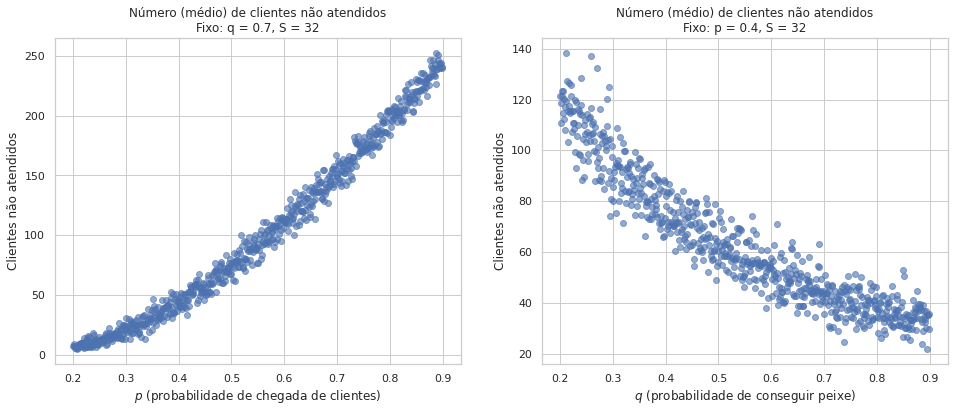

In [19]:
n_horas = 1000
fig, ax = plt.subplots(1,2,figsize=(16,6))

for p in np.arange(0.2, 0.9, 0.001):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=0.7, custo_peixe=32, capital_inicial=500)
  ax[0].plot(p, np.mean(df['ClientesPerdidos']), 'bo', alpha=.6)

  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=p, custo_peixe=32, capital_inicial=500)
  ax[1].plot(p, np.mean(df['ClientesPerdidos']), 'bo', alpha=.6)

ax[0].set_title('Número (médio) de clientes não atendidos\nFixo: q = 0.7, S = 32')
ax[0].set_ylabel('Clientes não atendidos')
ax[0].set_xlabel(r'$p$ (probabilidade de chegada de clientes)')

ax[1].set_title('Número (médio) de clientes não atendidos\nFixo: p = 0.4, S = 32')
ax[1].set_ylabel('Clientes não atendidos')
ax[1].set_xlabel(r'$q$ (probabilidade de conseguir peixe)')

plt.show()

Existem pedidos não atendidos

Correlação com $p$ (positiva):

- Quanto maior a probabilidade de chegada de clientes, maior o número de clientes e, consequentemente maior o número de não atendimentos

Correlação com $q$ (negativa):

- Quanto maior a probabilidade de pesca bem sucedida, maior a chance de existir um peixe em estoque ou de pescar um peixe quando um novo cliente aparece. Portanto, menor o número de clientes não atendidos

## Questão 4: 

- Caso $C(t) > C(t=0)$, (capital atual maior que o capital inicial), o pescador fica preguiçoso e sua probabilidade de pesca reduz em $0.8q$. Qual o valor apropriado de $S$?

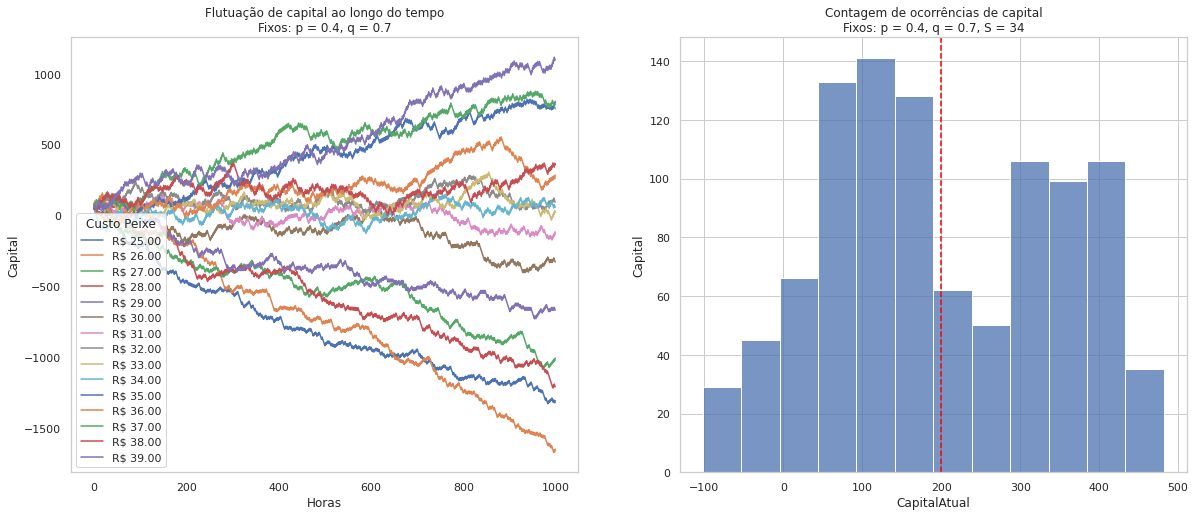

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
n_horas = 1000
dt = 1
custo_peixe = 25

for i in range(15):
  if custo_peixe > 39: dt = 5
  df = simular_N_horas_M_barracas_var_PQ_preguicoso(n_horas, 1, p=0.4, q=0.7, custo_peixe=custo_peixe, capital_inicial=60)
  ax[0].plot([i for i in range(len(df))], df['CapitalAtual'], label='R\$ {:.2f}'.format(custo_peixe))
  custo_peixe += dt

ax[0].set_ylabel('Capital')
ax[0].set_xlabel('Horas')
ax[0].set_title('Flutuação de capital ao longo do tempo\nFixos: p = 0.4, q = 0.7')

ax[0].grid()
ax[0].legend()

df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=34, capital_inicial=0)
sns.histplot(df, x='CapitalAtual', ax=ax[1], label='R\$ 32.00')
ax[1].axvline(np.mean(df['CapitalAtual']), color='red' , ls='dashed')

ax[0].legend(title='Custo Peixe')

ax[1].set_title('Contagem de ocorrências de capital\nFixos: p = 0.4, q = 0.7, S = 34')
ax[1].set_ylabel('Número de ocorrências')
ax[1].set_ylabel('Capital')

plt.show()

Modo preguiçoso: pior pesca ($q = 0.8 q$) caso o capital atual $C(t) > C(t=0)$

- A redução do número de peixe obtido faz com que quando $C(t) > C(t=0)$, exista pouca venda e, portanto, pouca renda

- O que vemos é um limitante do capital, onde para $S > 32$ (que originalmente estabiliza a o lucro no patamar do capital inicial) não há vantagens em termos de renda.

## Questão 5:

- Quantas horas ele terá que trabalhar entre dois descansos?

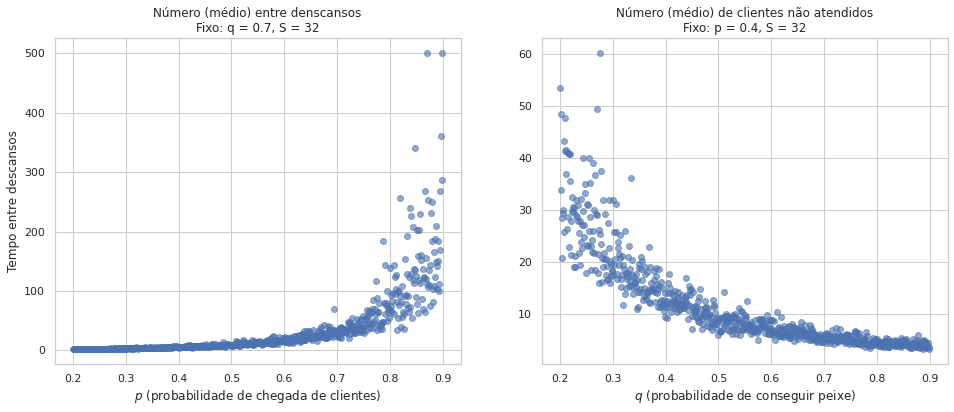

In [21]:
n_horas = 1000
fig, ax = plt.subplots(1,2,figsize=(16,6))

for p in np.arange(0.2, 0.9, 0.001):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=0.7, custo_peixe=32, capital_inicial=500)
  ax[0].plot(p, np.mean(df['TempoDescansos']), 'bo', alpha=.6)

  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=p, custo_peixe=32, capital_inicial=500)
  ax[1].plot(p, np.mean(df['TempoDescansos']), 'bo', alpha=.6)

ax[0].set_title('Número (médio) entre denscansos\nFixo: q = 0.7, S = 32')
ax[0].set_ylabel('Tempo entre descansos')
ax[0].set_xlabel(r'$p$ (probabilidade de chegada de clientes)')

ax[1].set_title('Número (médio) de clientes não atendidos\nFixo: p = 0.4, S = 32')
ax[0].set_ylabel('Tempo entre descansos')
ax[1].set_xlabel(r'$q$ (probabilidade de conseguir peixe)')

plt.show()

Tempo entre descansos segue uma distribuição tipicamente exponencial

Correlação com $p$ (positiva):

- Se $p$ pequeno, menos clientes aparecem e o intervalo entre descansos é pequeno. Ou seja, o pescador passa mais tempo descansando

- Se $p$ grande, ocorre o contrário. Mais clientes aparecem e maior o tempo entre descansos (menor o tempo descansando)

Correlação com $q$ (negativa):

- Se $q$ pequeno, menor a chance de conseguir peixe, e portanto maior a chance de precisar continuar pescando. Portanto, maior o tempo entre descansos (menos tempo descansando)

- Se $q$ grande, ocorre o contrário. A pesca é mais eficiente, permitindo maior tempo descansando e, portanto, menor tempo entre os descansos.

## Extras

#### Códigos

In [22]:
colunas = ['p', 'q', 'custo_peixe', 'capital_medio', 'capital_minimo', 'horas_descanso_medio']
dados = []
for p in np.arange(0.2, 0.8, 0.05):
  for q in np.arange(0.2, 0.8, 0.05):
    for custo_peixe in np.arange(25, 38, 2):
      n_horas = 5000
      df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=q, custo_peixe=custo_peixe, capital_inicial=500)
      dados.append([p, q, custo_peixe, np.mean(df['CapitalAtual']), np.min(df['CapitalAtual']), np.mean(df['TempoDescansos'])])

df_esp_fase = pd.DataFrame(dados, columns=colunas)

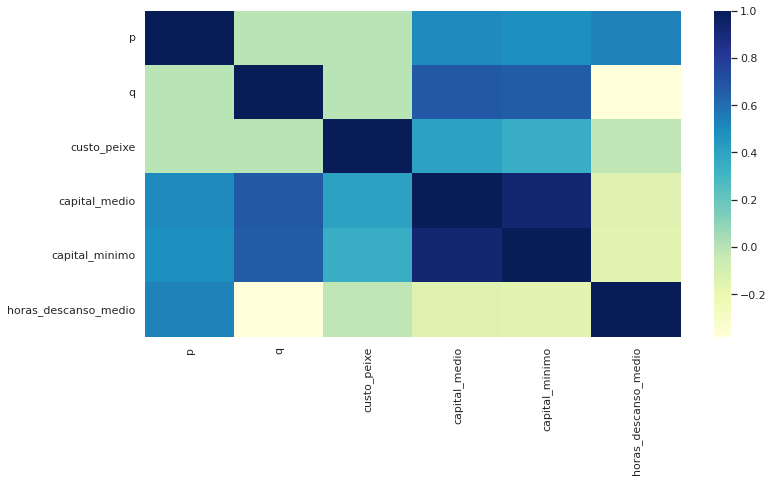

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df_esp_fase.corr(), cmap="YlGnBu",
            xticklabels=colunas,
            yticklabels=colunas)

Resultados em destaque: Correlação 

- horas_descanso (horas entre descansos) e $p$: altamente positiva: Quanto mais cliente chega, maior o tempo pescando e cozinhando, e menor o tempo entre descansos

- horas_descanso (horas entre descansos) e $q$: levemente negativa: Quanto melhor a habilidade de pesca, menor o tempo de pesca, e portanto maior o tempo entre descansos

In [24]:
falencia = np.array(df_esp_fase['capital_minimo'] < 0)
falencia = ['Falencia' if i == True else 'Prospero' for i in falencia]
df_esp_fase['Falencia'] = falencia
df_esp_fase.tail()


,p,q,custo_peixe,capital_medio,capital_minimo,horas_descanso_medio,Falencia
1178,0.8,0.8,29,7308.4002,508.0,52.6282,Prospero
1179,0.8,0.8,31,9589.1596,511.0,71.8638,Prospero
1180,0.8,0.8,33,11886.7598,513.0,59.9066,Prospero
1181,0.8,0.8,35,13683.7590,515.0,60.1202,Prospero
1182,0.8,0.8,37,16129.8430,517.0,56.4298,Prospero


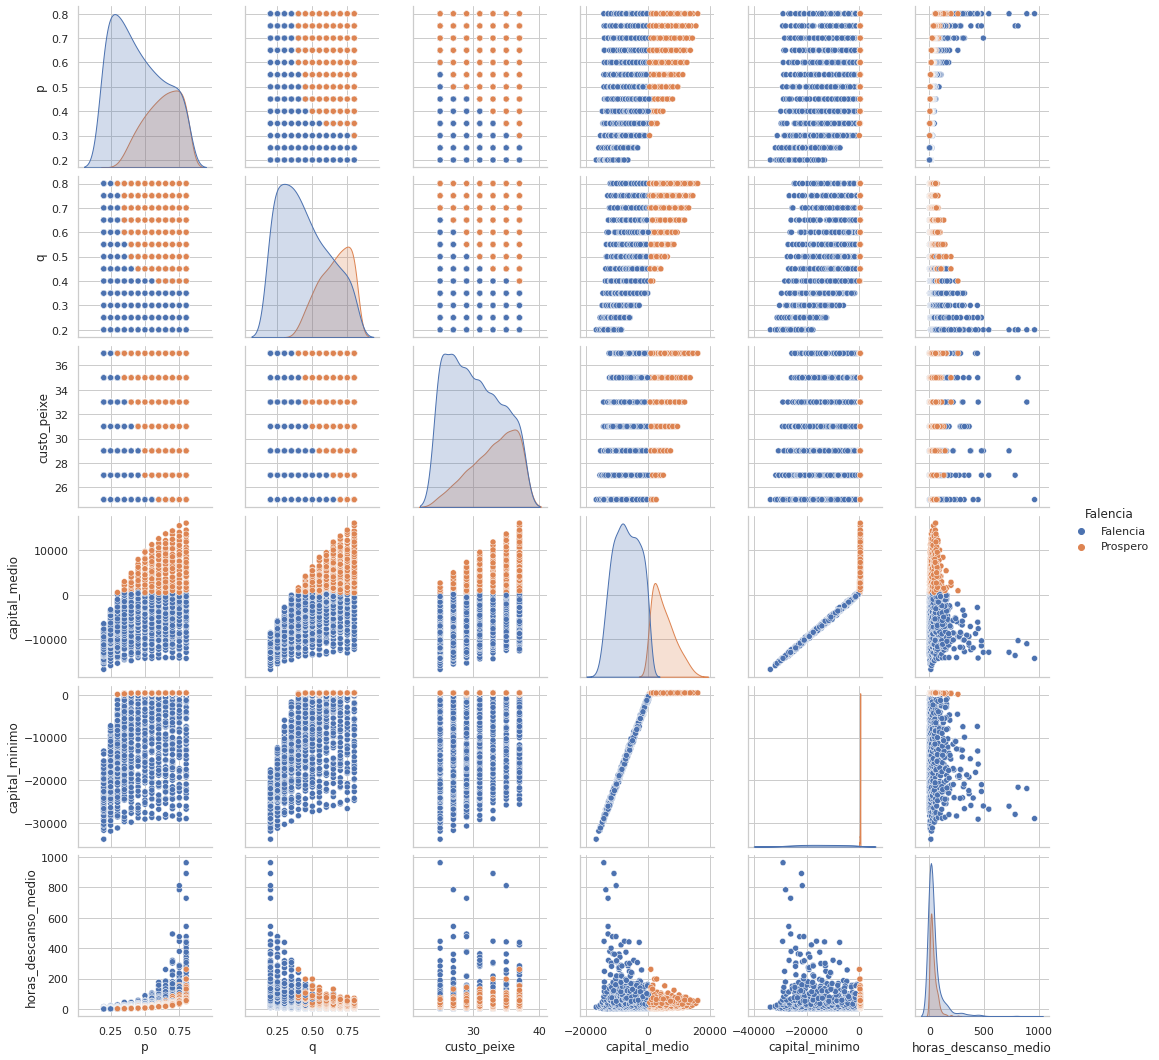

In [25]:
sns.pairplot(df_esp_fase, hue='Falencia')
plt.show()

Resultados em destaque:

- Espaço de estados: $p$ vs. $q$: Existe uma região para a qual temos falência, e uma região que leva à prosperidade do negócio.

- horas entre descansos: Distribuição exponencial

### Considerando:
- Capital inicial: R$ 0

- Falência: Caso $E[L(t)] < 0$ (valor esperado)

In [26]:
colunas = ['p', 'q', 'custo_peixe', 'capital_medio', 'capital_minimo', 'horas_descanso_medio']
dados = []
for p in np.arange(0.2, 0.8, 0.05):
  print(p)
  for q in np.arange(0.2, 0.8, 0.05):
    for custo_peixe in np.arange(25, 38, 2):
      n_horas = 5000
      df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=q, custo_peixe=custo_peixe, capital_inicial=0)
      dados.append([p, q, custo_peixe, np.mean(df['CapitalAtual']), np.min(df['CapitalAtual']), np.mean(df['TempoDescansos'])])

df_esp_fase = pd.DataFrame(dados, columns=colunas)

0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.5999999999999999
0.6499999999999999
0.7
0.7499999999999998
0.7999999999999998


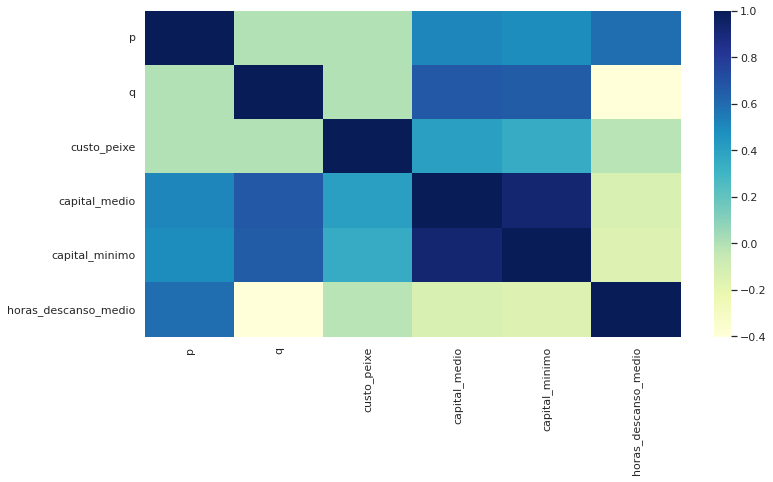

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df_esp_fase.corr(), cmap="YlGnBu",
            xticklabels=colunas,
            yticklabels=colunas)
plt.show()

In [28]:

falencia = np.array(df_esp_fase['capital_medio'] < 0)
falencia = ['Falencia' if i == True else 'Prospero' for i in falencia]
df_esp_fase['Falencia'] = falencia
df_esp_fase.head()


,p,q,custo_peixe,capital_medio,capital_minimo,horas_descanso_medio,Falencia
0,0.2,0.2,25,-16915.7300,-33825.0,12.8238,Falencia
1,0.2,0.2,27,-16179.4344,-32322.0,13.6004,Falencia
2,0.2,0.2,29,-15689.2198,-31836.0,14.8224,Falencia
3,0.2,0.2,31,-15006.4956,-29912.0,11.8884,Falencia
4,0.2,0.2,33,-14641.3896,-28814.0,15.4688,Falencia


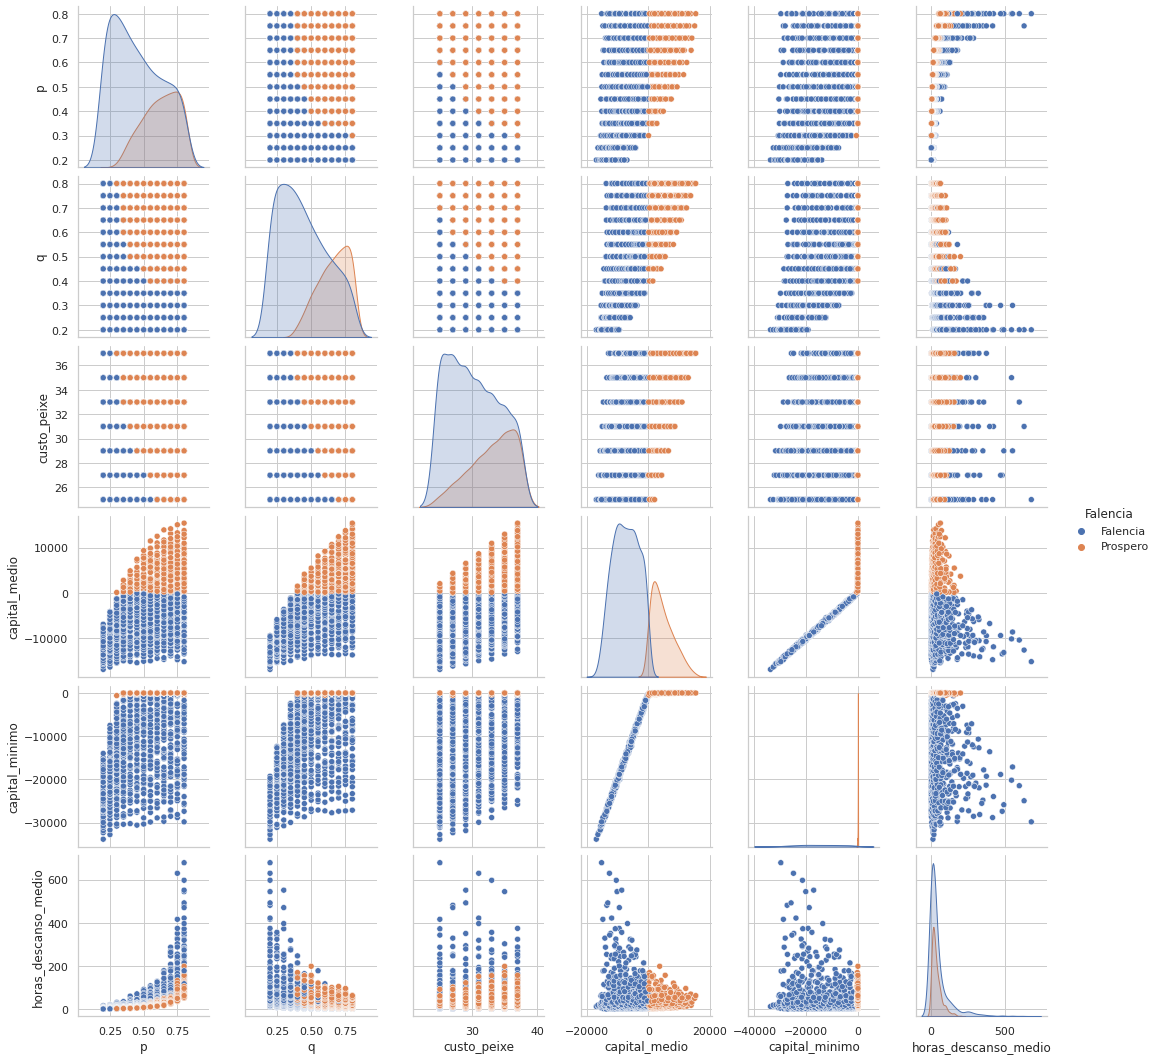

In [29]:
sns.pairplot(df_esp_fase, hue='Falencia')
plt.show()


## Teste de Hipóteses Para as Perguntas



Para responder as perguntas feitas inicialmente usamos as probabilidades 'brutas', agora iremos realizar um teste de hipóteses para as perguntas e respostas.

### Questão 1
- Qual o menor preço que o pescador deve cobrar para não ir à falência?

Anteriormente chegamos a conclusão que o preço, para p = 0.4 e q = 0.7, seria de cerca de 32 reais.
Vamos analisar a variável aleatória N, número de falências numa amostra e verificar se $p_N$, a proporção de falências é maior para um preço moderadamente menor (deve ser) e maior (não deve ser) para um nível de significância de 10% e 100 amostras.

Sendo $N_0$ o número de falências nas amostras cujo preço cobrado é 32, $N_m$ o número de falências nas amostras cujo preço cobrado é menor que 32 e $N_M$ o número de falências nas amostras cujo preço cobrado é maior que 32:

- $H_0: \,\,\ p_{N_{0}} = p_{N_{m}}$
- $H_a: \,\,\ p_{N_{0}} < p_{N_{m}}$

Também será analisada:

- $H_0: \,\,\ p_{N_{0}} = p_{N_{M}}$
- $H_a: \,\,\ p_{N_{0}} > p_{N_{M}}$


In [ ]:
def gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe):
  df = [simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=custo_peixe, capital_inicial=60) for i in range(n_dias)]
  res = pd.concat(df)

  colun = ['capital']
  capital = []
  clientesPerdi = []

  for i in range(n_dias):
    capital.append(np.mean(res['CapitalAtual'].iloc[n_horas*i:n_horas*(i+1)]))

  df_means = pd.DataFrame({colun[0]: capital})
  return df_means

In [ ]:
n_horas = 90
n_dias = 100

p = 0.4
q = 0.7

df_0 = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=32)
df_m = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=28)
df_M = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=34)

In [ ]:
df_0.head()

,capital
0,89.977778
1,72.555556
2,38.066667
3,18.866667
4,64.377778


In [ ]:
len(df_0)

100

In [ ]:
N_0 = len(df_0[df_0['capital'] <= 0])
N_m = len(df_m[df_m['capital'] <= 0])
N_M = len(df_M[df_M['capital'] <= 0])


p_0 = N_0 / len(df_0)
p_m = N_m / len(df_m)
p_M = N_M / len(df_M)
print(p_0)
print(p_M)
print(p_m)

0.11
0.06
0.55


In [ ]:
# Teste da hipótese nula, p_0 = p_m:
num = p_0 - p_m
pb = (N_0 * p_0 + N_m * p_m) / (N_0 + N_m)
denom = np.sqrt(pb * (1-pb) * ((1/N_0) + (1/N_m)))

z = num / denom
pvalor = stats.norm.cdf(z) # como H_a: p_m < 0 é unicaudal.

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

0.0038238721080654623
Rejeitar H0.


Assim, consideramos que é verdadeira a hipótese alternativa:
- $H_a: \,\,\ p_{N_{0}} < p_{N_{m}}$

Ou seja, ao diminuirmos o preço para menos de 32 a proporção de falência aumenta.

In [ ]:
#teste da hipótese nula p_0 = p_M:
num = p_0 - p_M
pb = (N_0 * p_0 + N_M * p_M) / (N_0 + N_M)
denom = np.sqrt(pb * (1-pb) * ((1/N_0) + (1/N_M)))

z = num / denom
pvalor = 1-stats.norm.cdf(z) #probabilidade unicaudal novamente
#como H_a é a probabilidade de ser maior que z, tomamos 1- p(z)

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print(" Rejeitar H0.")

0.36682365883860724
Aceitar H0.


Para um preço maior cobrado, a hipótese nula é aceita:
- $H_0: \,\,\ p_{N_{0}} = p_{N_{M}}$

Ou seja, ao aumentarmos o preço a proporção de falência não diminui de forma muito significativa. 

## Questão 2: 

- Qual é o capital final esperado após 900h, condicionado a não ter falido?


A falência do pescador está relacionada ao preço cobrado e o capital final estará relacionada ao capital inicial, caso o preço cobrado seja maior que 32 é esperado haver lucro: $C_f - C_0 > 0$, caso o preço cobrado seja 32 é esperado que na média o lucro seja: 0 $C_f - C_0 = 0\,$ e caso o preço cobrado seja menor que 32 é esperado haver falência: $C_f - C_0 < 0$.

As hipóteses analisadas aqui serão uma versão mais ampla das hipóteses analisadas na questão 1, já que o lucro e a falência podem ser diretamente relacionados. Sendo $L_0$ o lucro nas amostras cujo preço cobrado foi de 32, $L_m$ o lucro nas amostras cusjo preço cobrado foi menor que 32 e $L_M$ o lucro nas amostras cujo preço cobrado foi maior que 32:

Testaremos então, três hipóteses:

Lucro para preço = 32:
- $H_0: \mu_{L_{0}} = 0 $
- $H_a: \mu_{L_{0}} \neq 0 $


Lucro para preço < 32
- $H_0: \mu_{L_{m}} = 0 $
- $H_a: \mu_{L_{0}} < 0 $


Lucro para preço > 32
- $H_0: \mu_{L_{M}} = 0 $
- $H_a: \mu_{L_{M}} > 0 $


In [ ]:
def gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe):
  df = [simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=custo_peixe, capital_inicial=60) for i in range(n_dias)]
  res = pd.concat(df)

  colun = ['capital']
  capital = []
  clientesPerdi = []

  for i in range(n_dias):
    capital.append(np.mean(res['CapitalAtual'].iloc[n_horas*i:n_horas*(i+1)]))

  df_means = pd.DataFrame({colun[0]: capital})
  return df_means

In [ ]:
n_horas = 90
n_dias = 100

p = 0.4
q = 0.7

df_0 = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=32)
df_m = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=30)
df_M = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=34)

In [ ]:
N_0 = np.mean(df_0['capital']) - 60 #subtrair o capital inicial
N_m = np.mean(df_m['capital']) - 60
N_M = np.mean(df_M['capital']) - 60

var_0 = np.var(df_0['capital']) * (n_dias)/(n_dias - 1) #obter a variância amostral
var_m = np.var(df_m['capital']) * (n_dias)/(n_dias - 1)
var_M = np.var(df_M['capital']) * (n_dias)/(n_dias - 1)

p_H0 = 0
print(N_0)

-3.792888888888889


In [ ]:
#teste da hipótese nula para preço = 32
num = N_0 - p_H0
denom = np.sqrt(var_0/n_dias)

z = num / denom
pvalor = 2 * stats.norm.cdf(z)

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

0.4894372670856051
Aceitar H0.


Assim aceitamos a hipótese nula:
- $H_0: \mu_{L_{0}} = 0 $

De que o lucro médio, quando o preço cobrado é 32 será 0.

In [ ]:
#teste da hipótese nula para preço < 32, teste realizado com preço = 30
num = N_m - p_H0
denom = np.sqrt(var_m/n_dias)

z = num / denom
pvalor = stats.norm.cdf(z)

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

6.844993114907364e-45
Rejeitar H0.


Rejeitamos a hipótese nula, portanto é verdadeira a hipótese alternativa:
- $H_a: \mu_{L_{m}} < 0 $

Mostrando que a média dos lucros será negativa (condiz com o resultado da questão 1)


In [ ]:
#teste da hipótese nula para preço > 32 teste realizado com preço = 34
num = N_M - p_H0
denom = np.sqrt(var_M/n_dias)

z = num / denom
pvalor = 1- stats.norm.cdf(z) #novamente, como a alternativa é
#ser maior que 0 e p(z) representa a probabilidade de ser <= z, tomamos 1- p(z)

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

7.226597098508591e-11
Rejeitar H0.


Assumimos verdadeira então a hipótese alternativa:

- $H_a: \mu_{L_{M}} > 0 $

Assim, ao se cobrar um preço maior que 32 a média de lucro aumenta.


## Questão 3: 

- Caso $C(t) > C(t=0)$, (capital atual maior que o capital inicial), o pescador fica preguiçoso e sua probabilidade de pesca reduz em $0.8q$. Qual o valor apropriado de $S$?

Poderíamos retestar a hipótese do valor apropriado usando o número de falências, porém é mais interessante analisar o lucro, já que a conclusão que foi tirada anteriormente era que o lucro seria menor quando valores maiores eram cobrados comparado com o lucro obtido sem o modo preguiçoso. No modo preguiçoso 32 foi o menor valor inteiro que estabiliza a média de lucros como 0. Sendo ${L_{M_{p}}}$ uma amostra do lucro médio no modo preguiçoso, quando o preço é maior que 32 e ${L_{m_{p}}}$ uma amostra do lucro médio no modo preguiçoso, quando o preço é menor que 32.


Assim, as hipóteses estudadas seriam:

Os lucros no modo preguiçoso são iguais aos lucros sem a o modo preguiçoso, para os mesmos preços cobrados?

Para o valor 32 sendo cobrado:
- $H_0: \mu_{L_{0_{p}}} = \mu_{L_{0}} $ 
- $H_a: \mu_{L_{0_{p}}} < \mu_{L_{0}} $

Para um valor menor que 32:

- $H_0: \mu_{L_{m_{p}}} = \mu_{L_{m}} $ 
- $H_a: \mu_{L_{m_{p}}} < \mu_{L_{m}}$

Para um valor maior que 32:
- $H_0: \mu_{L_{M_{p}}} = \mu_{L_{M}} $ 
- $H_a: \mu_{L_{M_{p}}} < \mu_{L_{M}}$

In [ ]:
def gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe):
  df = [simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=q, custo_peixe=custo_peixe, capital_inicial=60) for i in range(n_dias)]
  res = pd.concat(df)

  colun = ['capital']
  capital = []
  clientesPerdi = []

  for i in range(n_dias):
    capital.append(np.mean(res['CapitalAtual'].iloc[n_horas*i:n_horas*(i+1)]))

  df_means = pd.DataFrame({colun[0]: capital})
  return df_means

In [ ]:
def gerar_amostras_medias_preguicoso(n_horas, n_dias, p, q, custo_peixe):
  df_2 = [simular_N_horas_M_barracas_var_PQ_preguicoso(n_horas, 1, p=p, q=q, custo_peixe=custo_peixe, capital_inicial=40) for i in range(n_dias)]
  res_2 = pd.concat(df_2)

  colun = ['capital']

  capital = []

  for i in range(0, n_dias):
    capital.append((np.mean(res_2['CapitalAtual'].iloc[n_horas*i:n_horas*(i+1)])))

  df_means_2 = pd.DataFrame({colun[0]: capital})
  return df_means_2

In [ ]:
n_horas = 90
n_dias = 200

p = 0.4
q = 0.7

#dados preguiçosos:
df_0_p = gerar_amostras_medias_preguicoso(n_horas, n_dias, p, q, custo_peixe=32)
df_m_p = gerar_amostras_medias_preguicoso(n_horas, n_dias, p, q, custo_peixe=29)
df_M_p = gerar_amostras_medias_preguicoso(n_horas, n_dias, p, q, custo_peixe=34)

#dados normais
df_0 = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=32)
df_m = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=29)
df_M = gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe=34)

In [ ]:
#média e variância para os casos preguiçosos:
N_0_p = np.mean(df_0_p['capital']) - 40 #subtrair o capital inicial
N_m_p = np.mean(df_m_p['capital']) - 40
N_M_p = np.mean(df_M_p['capital']) - 40

var_0_p = np.var(df_0_p['capital']) * (n_dias)/(n_dias - 1)
var_m_p = np.var(df_m_p['capital']) * (n_dias)/(n_dias - 1)
var_M_p = np.var(df_M_p['capital']) * (n_dias)/(n_dias - 1)

print(N_0_p)
print(N_m_p)
print(N_M_p)


-4.931333333333335
-38.06
6.606666666666662


In [ ]:
#média e variância para os casos normais:
N_0 = np.mean(df_0['capital']) - 60 #subtrair o capital inicial
N_m = np.mean(df_m['capital']) - 60
N_M = np.mean(df_M['capital']) - 60

var_0 = np.var(df_0['capital']) * (n_dias)/(n_dias - 1) #obter a variância amostral
var_m = np.var(df_m['capital']) * (n_dias)/(n_dias - 1)
var_M = np.var(df_M['capital']) * (n_dias)/(n_dias - 1)

print(N_0)
print(N_m)
print(N_M)

-0.09511111111110893
-36.352777777777774
24.604


In [ ]:
num = N_0_p - N_0
denom = np.sqrt(var_0/n_dias + var_0_p/n_dias)

z = num / denom
pvalor = stats.norm.cdf(z) 

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

0.13902429232972463
Aceitar H0.


Aceitamos H0 para o valor 32 sendo cobrado:

- $H_0: \mu_{L_{0_{p}}} = \mu_{L_{0}} $ 

Assim vemos que no modo preguiçoso, o preço de 32 estabiliza, pois como a média do lucro se mantém em 0, dificilmente o pescador terá um capital atual maior que o inicial, então será preguiçoso por pouco tempo.


In [ ]:
num = N_m_p - N_m
denom = np.sqrt(var_m/n_dias + var_m_p/n_dias)

z = num / denom
pvalor = stats.norm.cdf(z) 

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

0.34969558820737123
Aceitar H0.


Aceitamos a hipótese nula, assim, para valores cobrados menores que 32:

- $H_0: \mu_{L_{m_{p}}} = \mu_{L_{m}} $ 

O que faz sentido, já que cobrando preços menores que 32, o pescador, na média, não obtém lucro, assim ele não será preguiçoso. 

In [ ]:
num = N_M_p - N_M
denom = np.sqrt(var_M/n_dias + var_M_p/n_dias)

z = num / denom
pvalor = stats.norm.cdf(z) 

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

0.00017133449732344006
Rejeitar H0.


Rejeitamos a hipótese nula, então é verdadeira:

- $H_a: \mu_{L_{M_{p}}} < \mu_{L_{M}}$

Assim, o lucro no modo preguiçoso é menor que o lucro sem tal modo.

## Questão 4:

- Quantas horas ele terá que trabalhar entre dois descansos?

O teste de hipótese seguirá o que foi apontado para a correlação entre as variáveis p,q e o número de horas entre cada descanso. Quanto maior a habilidade de pesca, menor o número de horas entre cada descanso. Quanto maior o fluxo de clientes (maior probabilidade de clientes aparecerem) maior o número de horas entre cada descanso.

Sendo $h_i$ a média de horas entre descanso em amostras com p = 0.4 e q = 0.7 $h_p$ a média de horas entre cada descanso com p > 0.4 e q = 0.7 e $h_q$ a média de horas entre cada descanso com p = 0.4 e q > 0.7 

As hipóteses a serem testadas:

Para q > 0.7
- $H_0: \mu_{h_{i}} = \mu_{h_{q}}$
- $H_a: \mu_{h_{i}} > \mu_{h_{q}}$

Para p > 0.4:

- $H_0: \mu_{h_{i}} = \mu_{h_{p}}$
- $H_a: \mu_{h_{i}} < \mu_{h_{p}}$


In [ ]:
def gerar_amostras_medias(n_horas, n_dias, p, q, custo_peixe):
  df = [simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=q, custo_peixe=custo_peixe, capital_inicial=20) for i in range(n_dias)]
  res = pd.concat(df)

  colun = ['horaEntreDescanso']
  capital = []
  clientesPerdi = []

  for i in range(n_dias):
    capital.append(np.mean(res['TempoDescansos'].iloc[n_horas*i:n_horas*(i+1)]))

  df_means = pd.DataFrame({colun[0]: capital})
  return df_means

In [ ]:
n_horas = 90
n_dias = 100

q = 0.7

df_i = gerar_amostras_medias(n_horas, n_dias, p=0.4, q=0.7, custo_peixe=32)
df_p = gerar_amostras_medias(n_horas, n_dias, p=0.45, q=0.7, custo_peixe=32)
df_q = gerar_amostras_medias(n_horas, n_dias, p=0.4, q=0.77, custo_peixe=32)


In [ ]:
N_i = np.mean(df_i['horaEntreDescanso'])
N_p = np.mean(df_p['horaEntreDescanso'])
N_q = np.mean(df_q['horaEntreDescanso'])

var_i = np.var(df_i['horaEntreDescanso']) * (n_dias)/(n_dias - 1)
var_p = np.var(df_p['horaEntreDescanso']) * (n_dias)/(n_dias - 1)
var_q = np.var(df_q['horaEntreDescanso']) * (n_dias)/(n_dias - 1)

print(N_i)
print(N_q)
print(N_p)


5.519333333333333
4.551333333333333
6.264444444444445


In [ ]:
num = N_q - N_i
denom = np.sqrt((var_i/n_dias) + (var_q/n_dias))

z = num / denom
pvalor = stats.norm.cdf(z)

print(pvalor)

signif = 0.1
if (pvalor > signif): print("Aceitar H0.")
else: print("Rejeitar H0.")

0.001489014630837964
Rejeitar H0.


Rejeitamos H0, então quanto maior a habilidade de pescar, menor o número de horas entre cada descanso.

In [ ]:
num = N_p - N_i
denom = np.sqrt((var_i/n_dias) + (var_p/n_dias))

z = num / denom
pvalor = 1- stats.norm.cdf(z)

print(pvalor)

signif = 0.1
if (pvalor > signif): print("ReAceitar H0.")
else: print("Rejeitar H0.")

0.02309721032469747
Rejeitar H0.


Rejeitamos H0, então o pescador terá menor frequência de descansos quanto maior for o fluxo de clientes.
Podemos notar como essas métricas são sensíveis, mudando apenas 0.05 o impacto na média é suficiente para alterá-la, considerando um nível de significância de 10%.